In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import numpy as np



In [2]:
neighborhoods = gpd.read_file('data/neighborhood.geojson')
bikeroutes = []
years = [2017,2018,2019,2020,2021,2022]
for y in years:
    temp = gpd.read_file(f'data/Archived_nyc_bike_routes_{y}/nyc_bike_routes_{y}.shp')
    temp = temp.to_crs(epsg=4326)

    bikeroutes.append(temp)

In [3]:
neighborhoods.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08   77412747.847         081             St. Albans   45401.316803   
1    BX28  25666124.5948         005  Van Cortlandt Village   21945.719299   
2    QN55  82461393.7368         081       South Ozone Park  36708.1693055   
3    BK50  82089678.6389         047               Canarsie  43703.6096661   
4    BX41  14716710.7402         005             Mount Hope   18937.247819   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
2    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...  
3  Brooklyn         3  MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...  
4     Bronx         2  MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ...

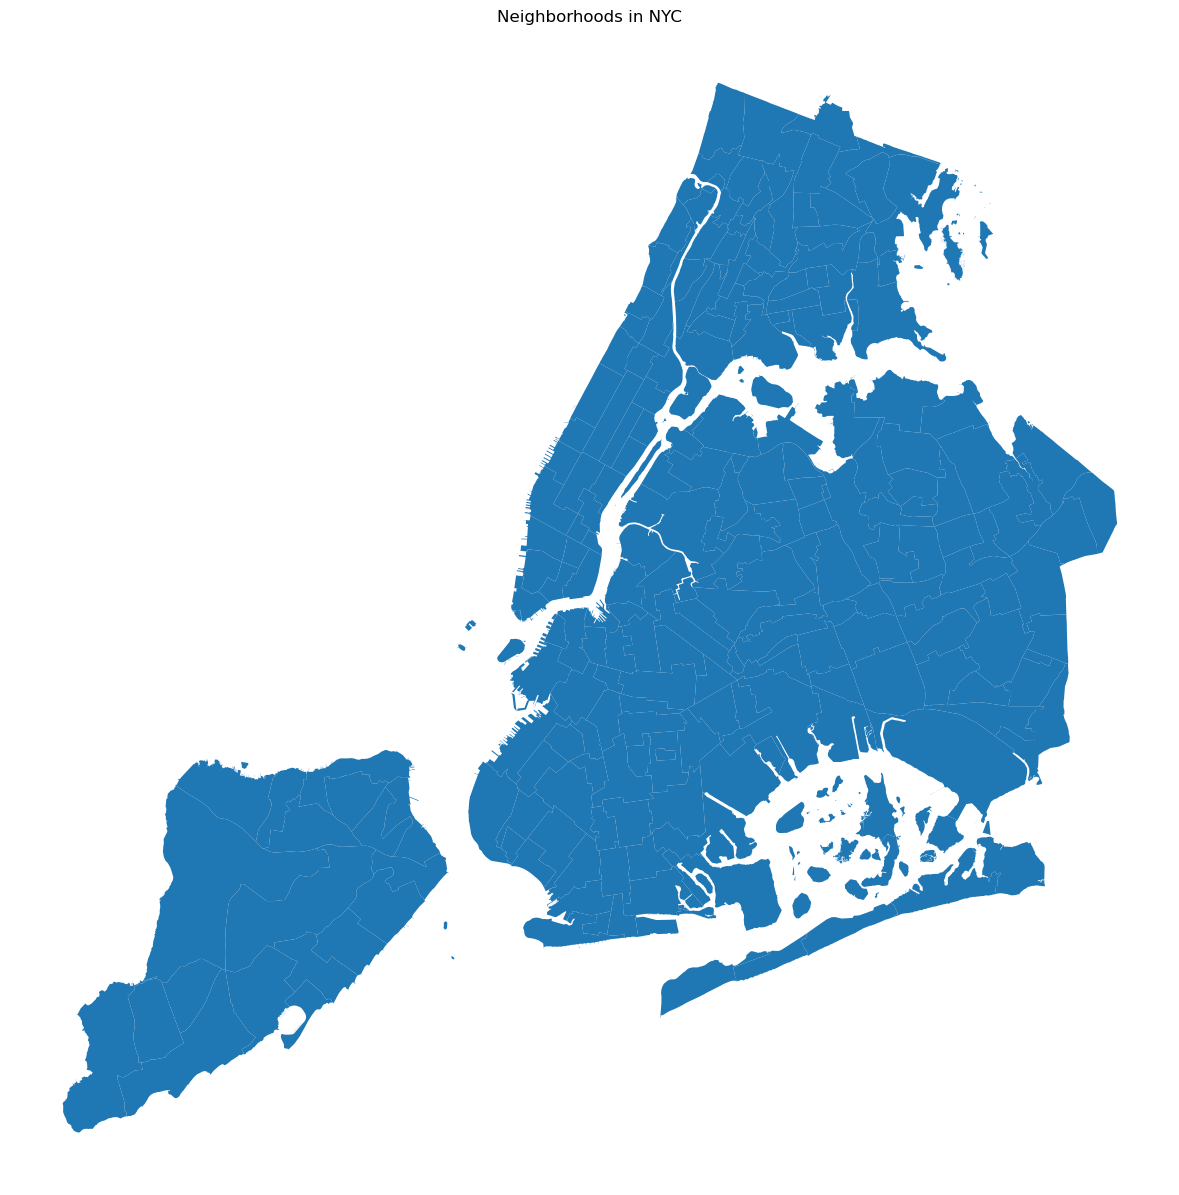

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax)
plt.title('Neighborhoods in NYC')
plt.axis('off')
plt.show()

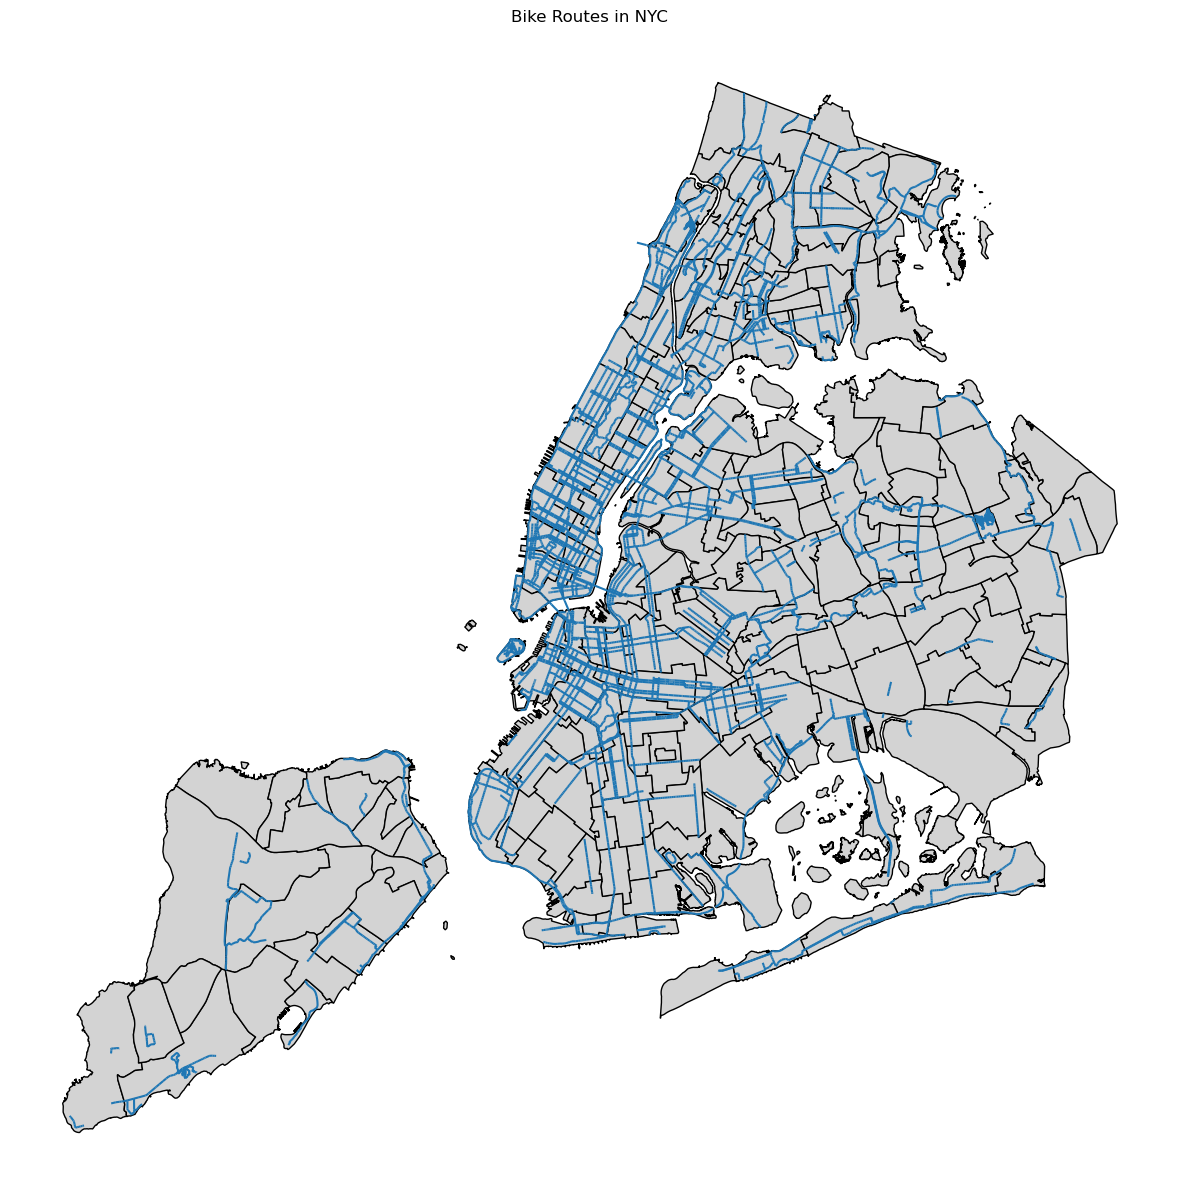

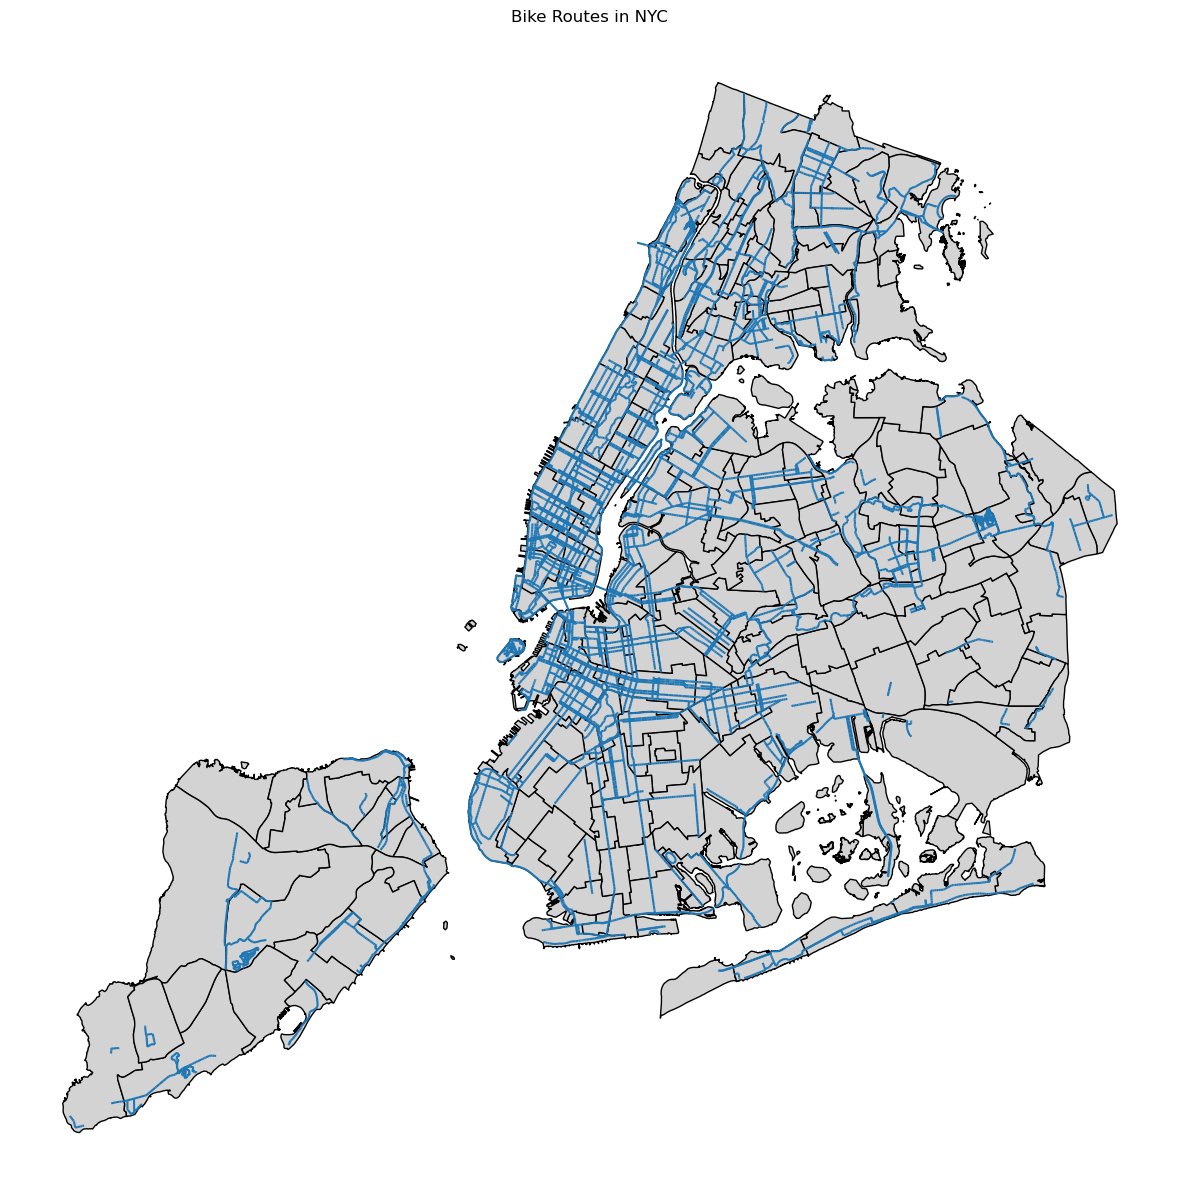

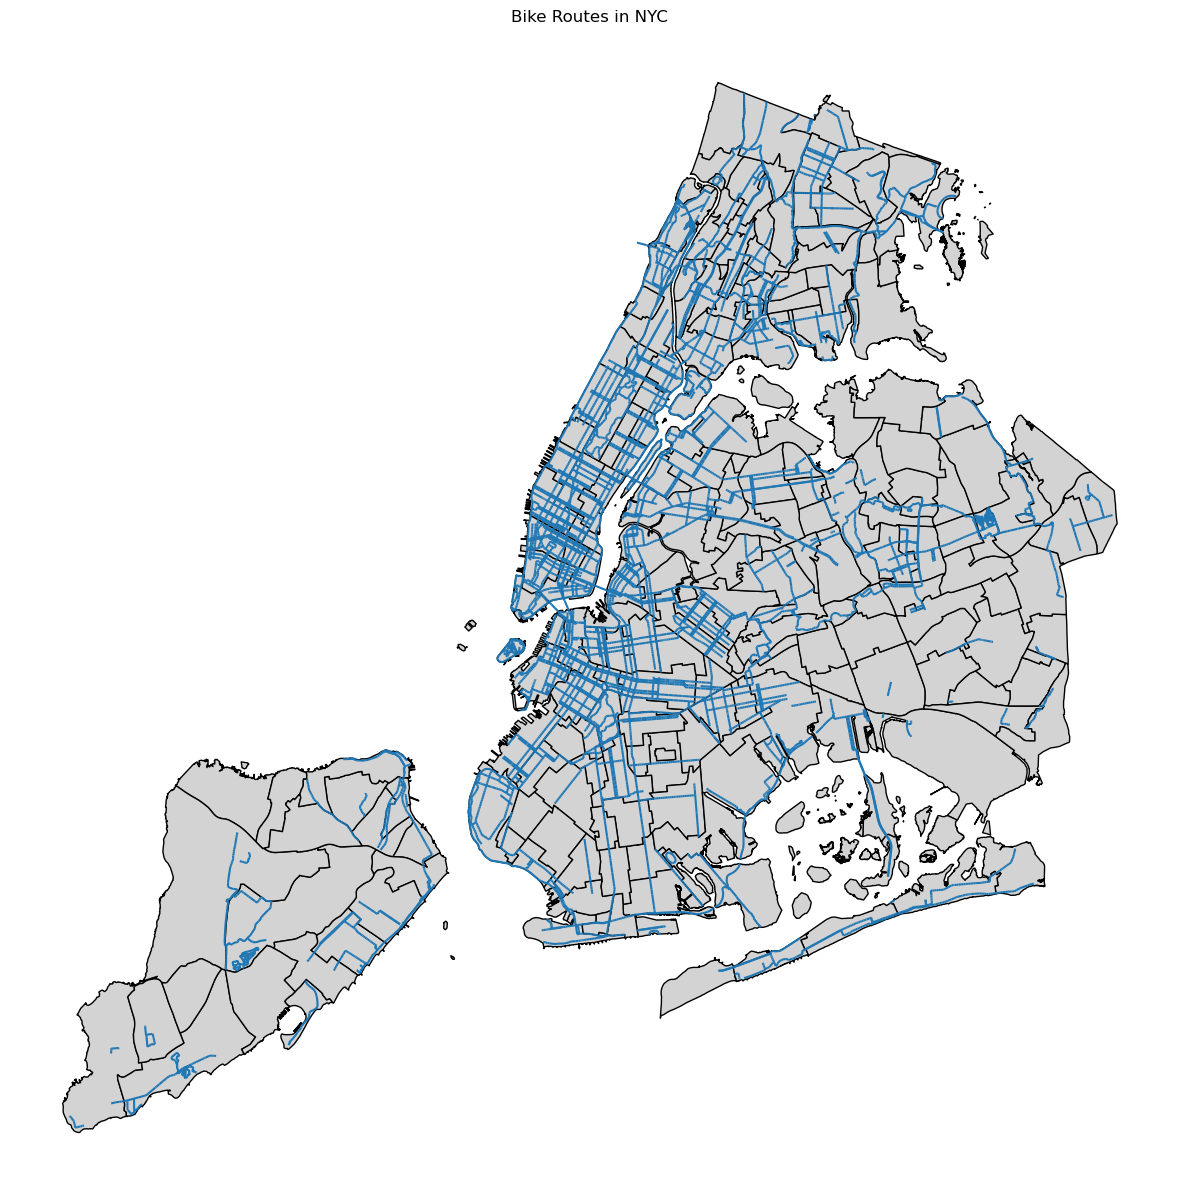

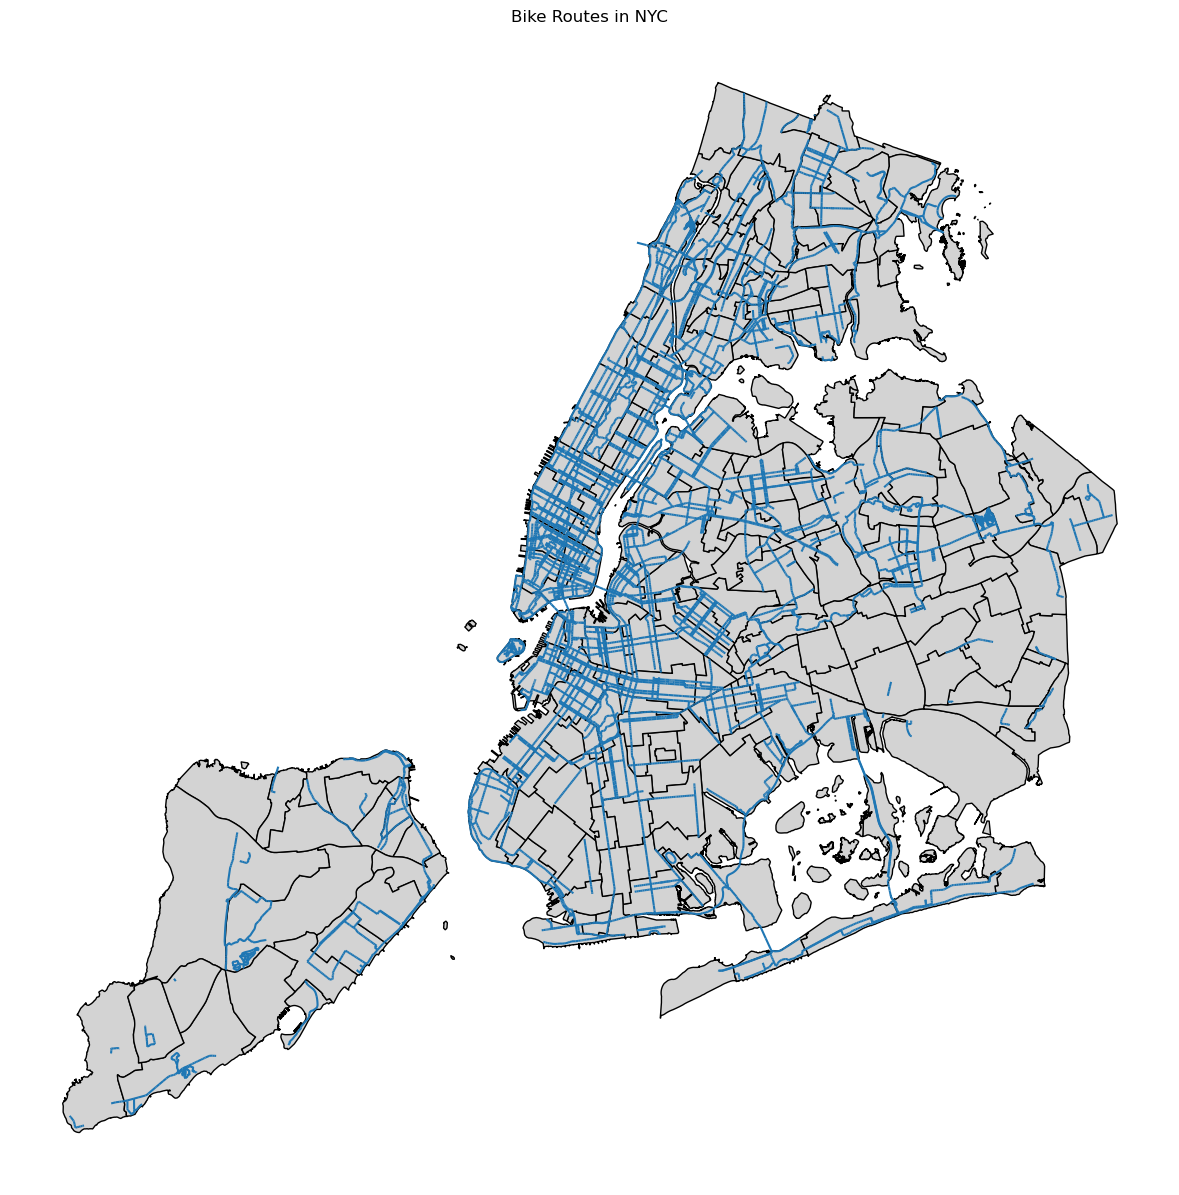

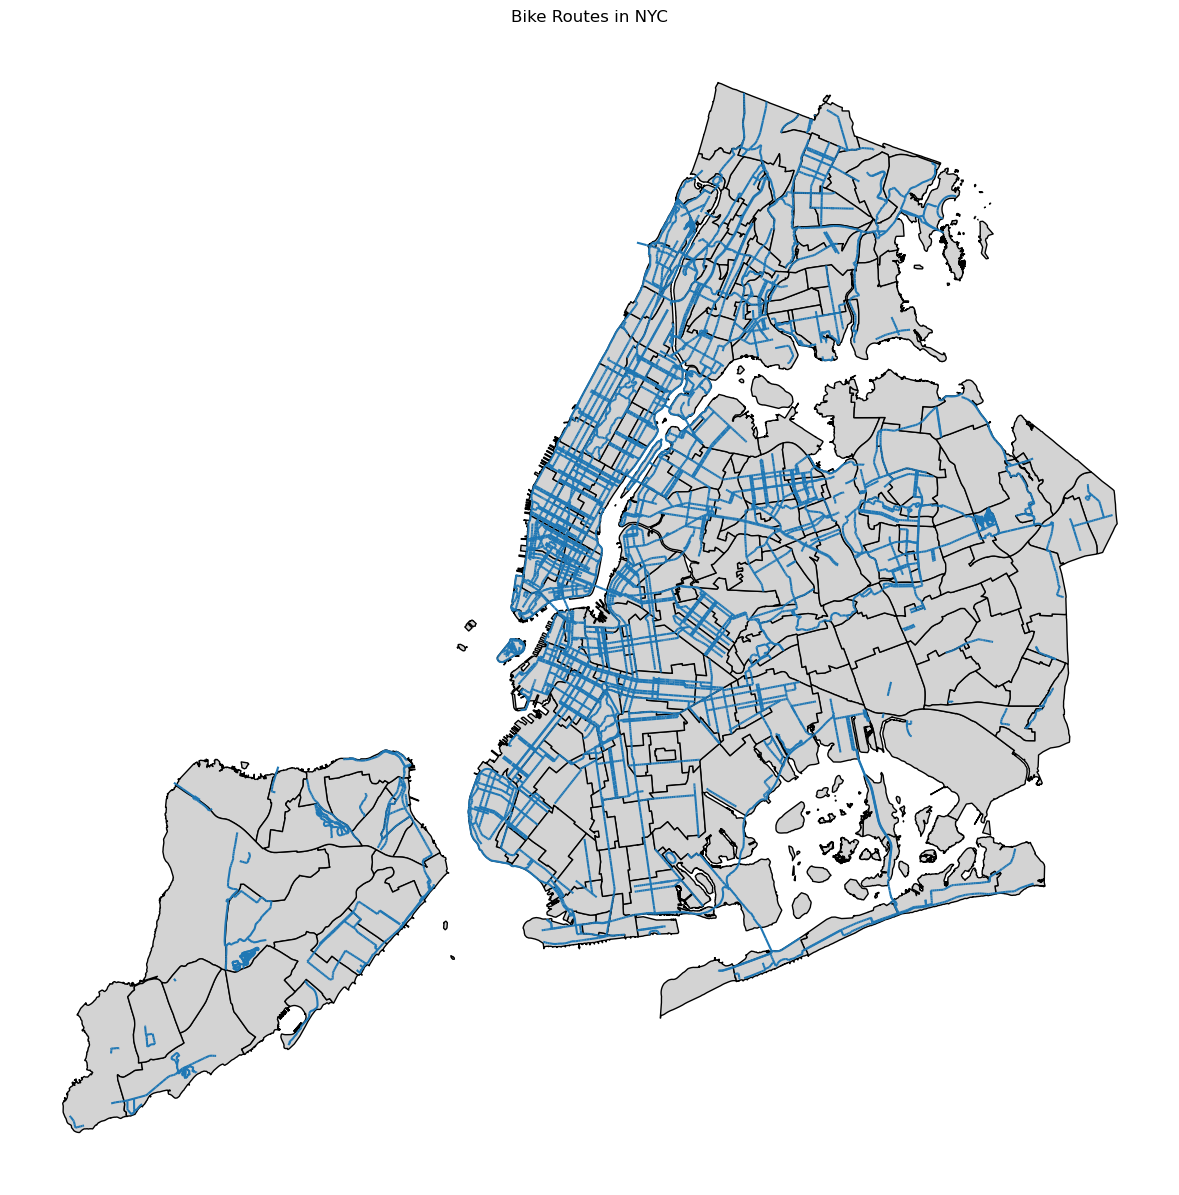

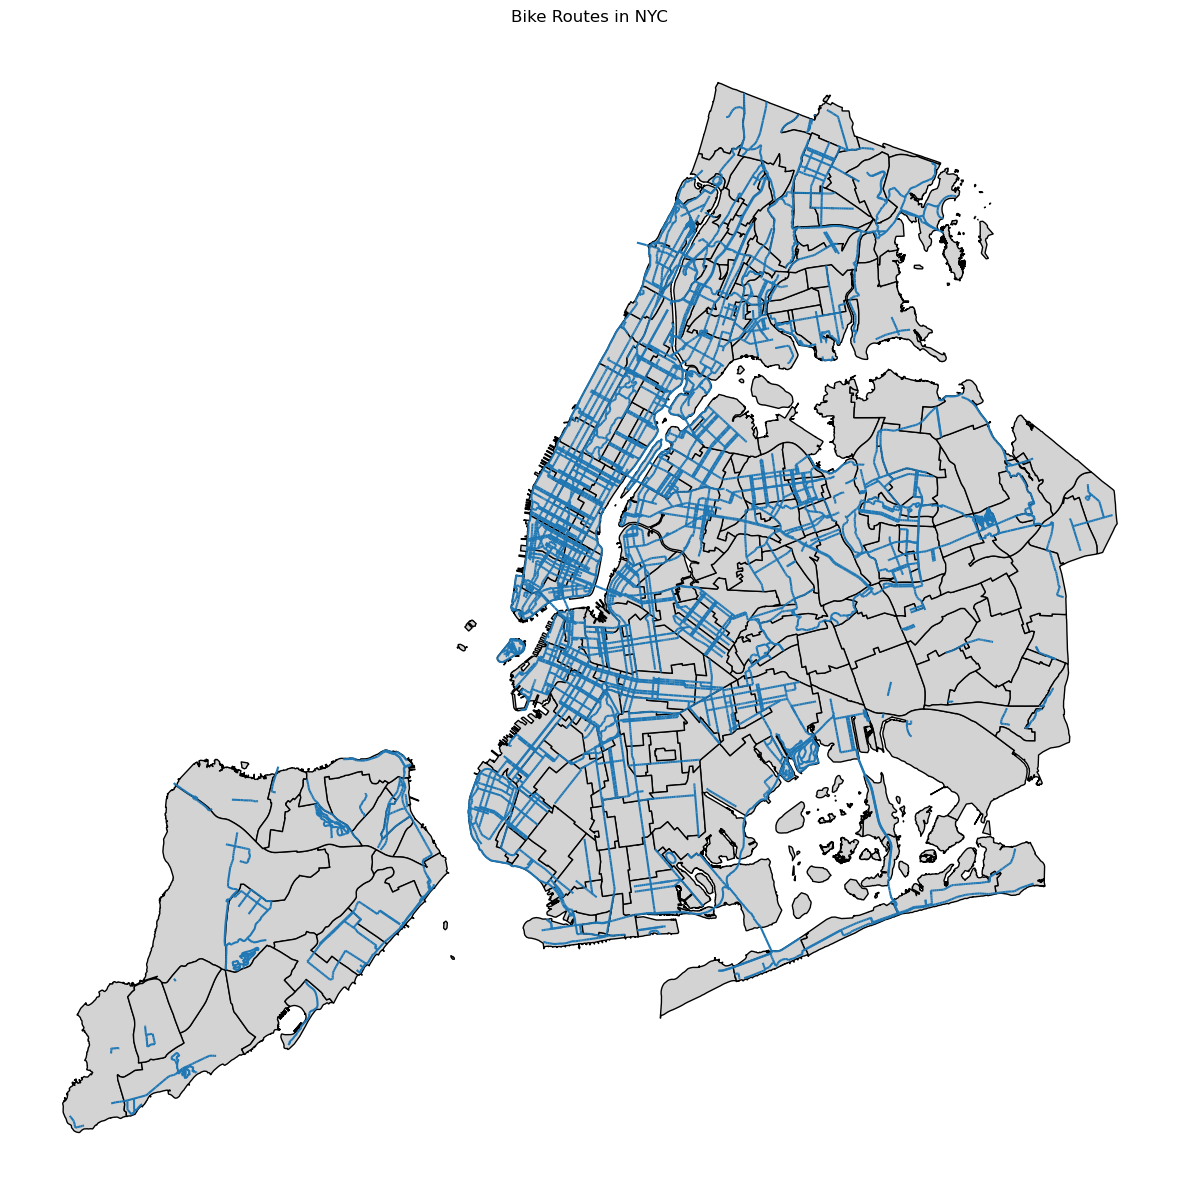

In [5]:
for i in range(len(years)):
    fig, ax = plt.subplots(figsize=(15, 15))
    bikeroutes[i].plot(ax=ax)
    neighborhoods.plot(ax=ax, color='lightgrey', edgecolor='black')
    plt.title(f'Bike Routes in NYC')
    plt.axis('off')
    plt.show()

In [10]:
neighborhoods['shape_area'] = pd.to_numeric(neighborhoods['shape_area'])

for i in range(len(years)):
    bikeroutes[i]['route_length'] = bikeroutes[i].geometry.length
    merged_data = gpd.sjoin(neighborhoods, bikeroutes[i], how='left', op='intersects')
    route_counts = merged_data.groupby('ntacode')['route_length'].sum().reset_index(name=f'route_length_{years[i]}')
    neighborhoods = neighborhoods.merge(route_counts, on='ntacode')
    neighborhoods[f'density_route_length_{years[i]}'] = neighborhoods[f'route_length_{years[i]}'] / neighborhoods['shape_area']
neighborhoods.head()

C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_104272\4156139673.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeroutes[i]['route_length'] = bikeroutes[i].geometry.length
D:\Anaconda\envs\cusp8093\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_104272\4156139673.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeroutes[i]['route_length'] = bikeroutes[i].geometry.length
D:\Anaconda\envs\cusp8093\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: Th

ntacode    shape_area county_fips                ntaname     shape_leng  \
0    QN08  7.741275e+07         081             St. Albans   45401.316803   
1    BX28  2.566612e+07         005  Van Cortlandt Village   21945.719299   
2    QN55  8.246139e+07         081       South Ozone Park  36708.1693055   
3    BK50  8.208968e+07         047               Canarsie  43703.6096661   
4    BX41  1.471671e+07         005             Mount Hope   18937.247819   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   
1     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...   
2    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...   
3  Brooklyn         3  MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...   
4     Bronx         2  MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ...   

   route_length_2017_x  route_length_2017_y  ...  route_length_2018  \
0             0.017639             0.017639  ...           0.017639   
1             0.045731             0.045731  ...           0.045731   
2             0.005841             0.005841  ...           0.005841   
3             0.057696             0.057696  ...           0.067970   
4             0.046964             0.046964  ...           0.046964   

   density_route_length_2018  route_length_2019  density_route_length_2019  \
0               2.278552e-10           0.015868               2.049805e-10   
1               1.781777e-09           0.051263               1.997299e-09   
2               7.082972e-11           0.006422               7.787961e-11   
3               8.279955e-10           0.068566               8.352545e-10   
4               3.191221e-09           0.051769               3.517689e-09   

   route_length_2020  density_route_length_2020  route_length_2021  \
0           0.017639               2.278552e-10           0.015868   
1           0.048916               1.905848e-09           0.051263   
2           0.005841               7.082972e-11           0.006422   
3           0.069446               8.459824e-10           0.059094   
4           0.051123               3.473826e-09           0.055928   

   density_route_length_2021  route_length_2022  density_route_length_2022  
0               2.049805e-10           0.015868               2.049805e-10  
1               1.997299e-09           0.051263               1.997299e-09  
2               7.787961e-11           0.006422               7.787961e-11  
3               7.198707e-10           0.059094               7.198707e-10  
4               3.800306e-09           0.055928               3.800306e-09  

[5 rows x 22 columns]

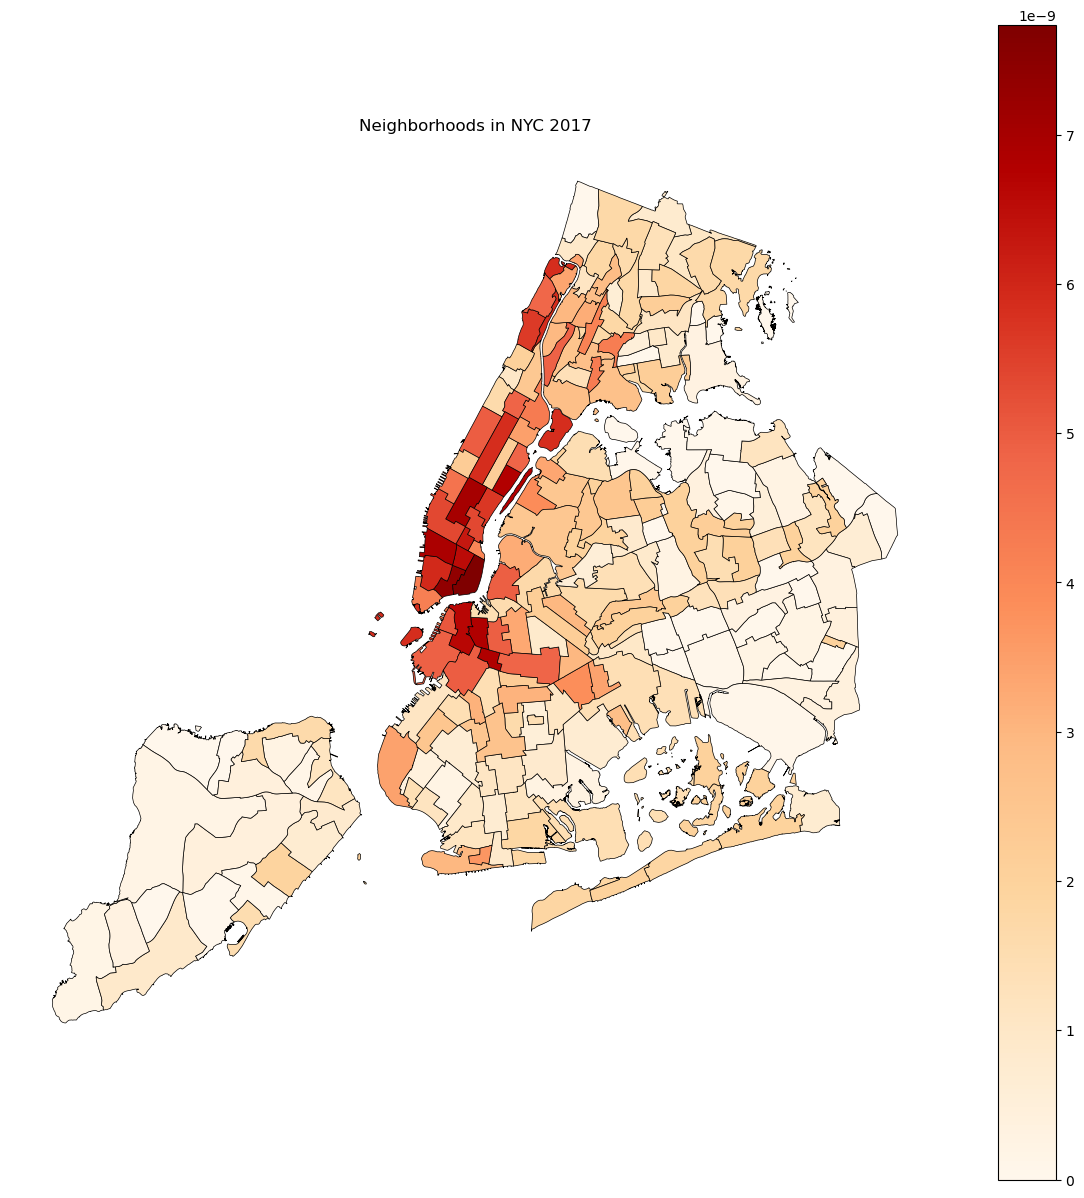

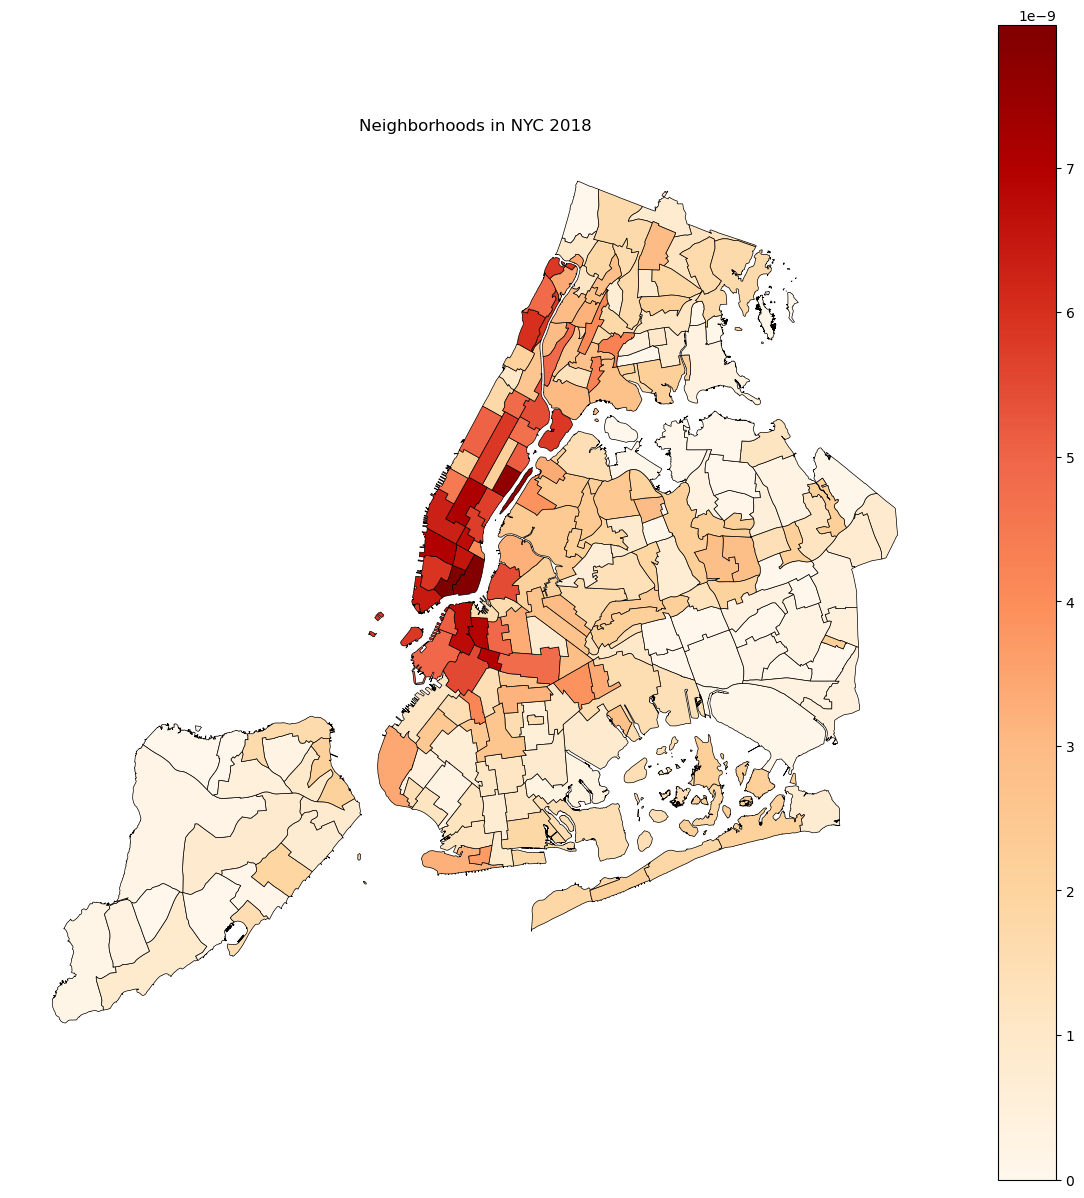

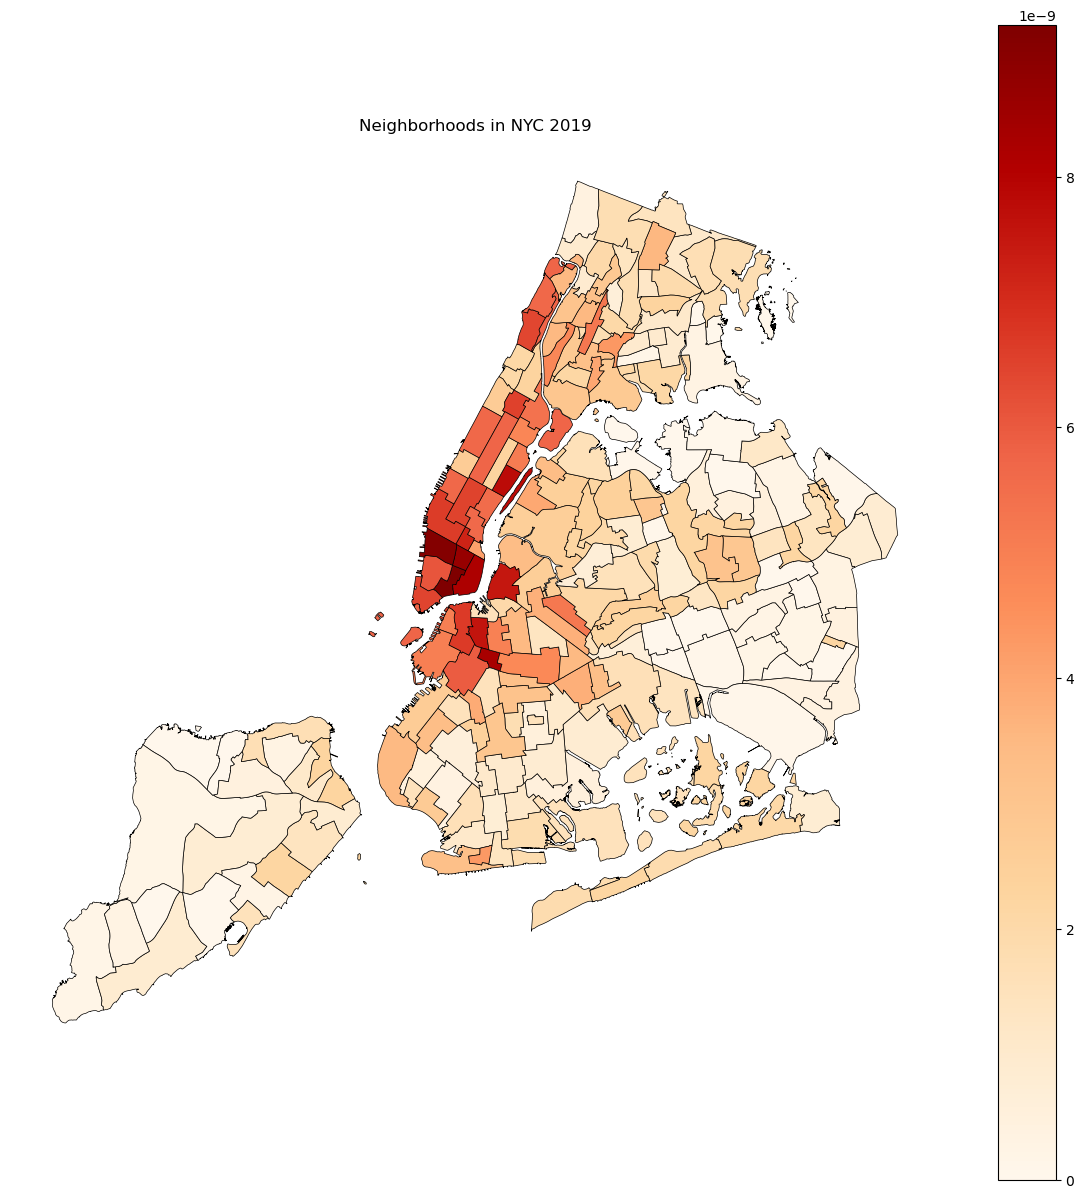

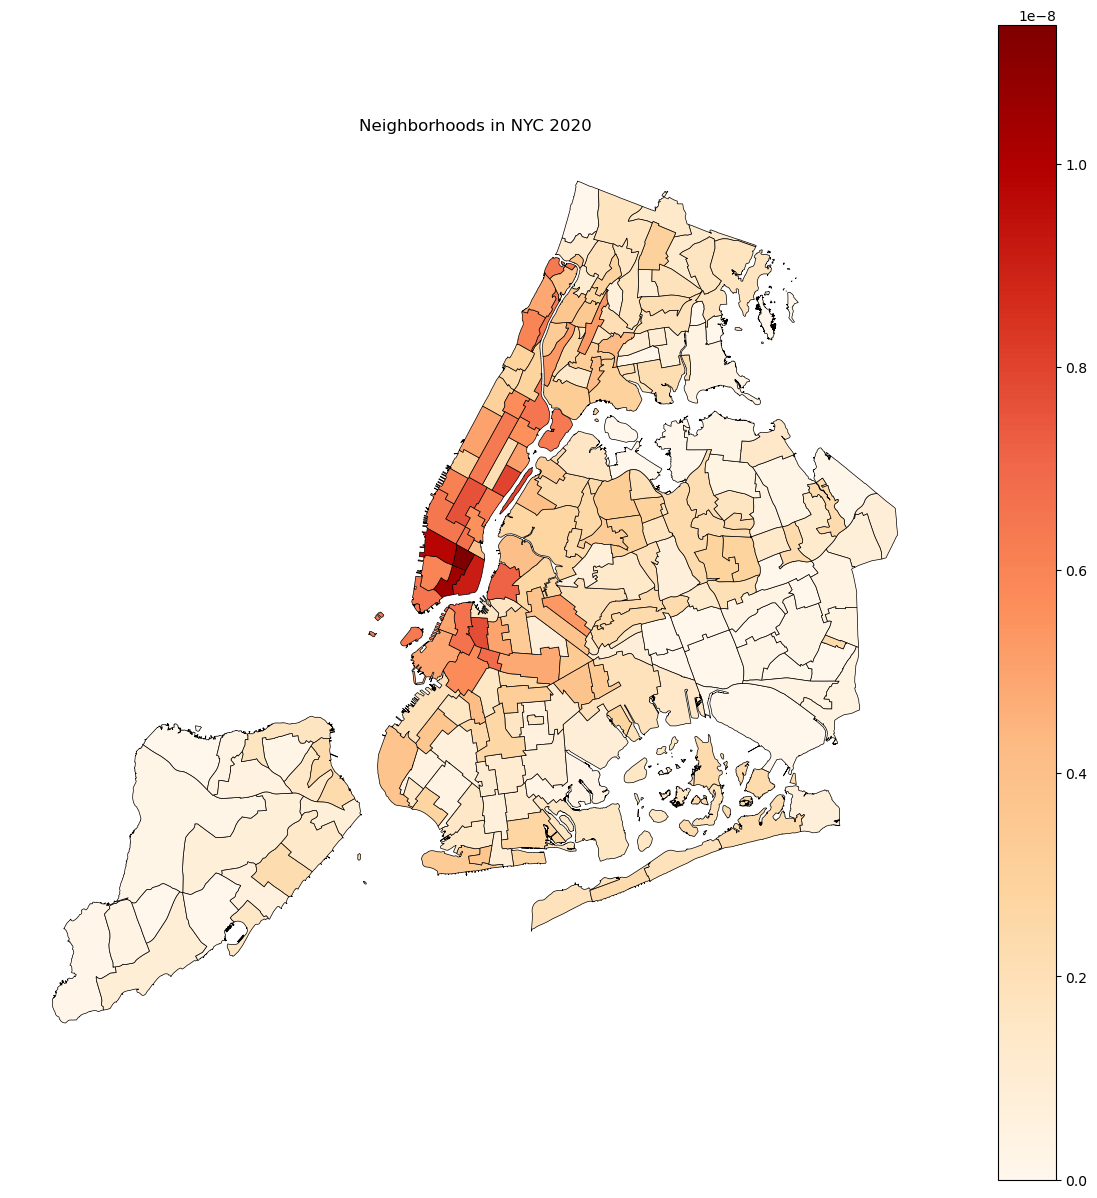

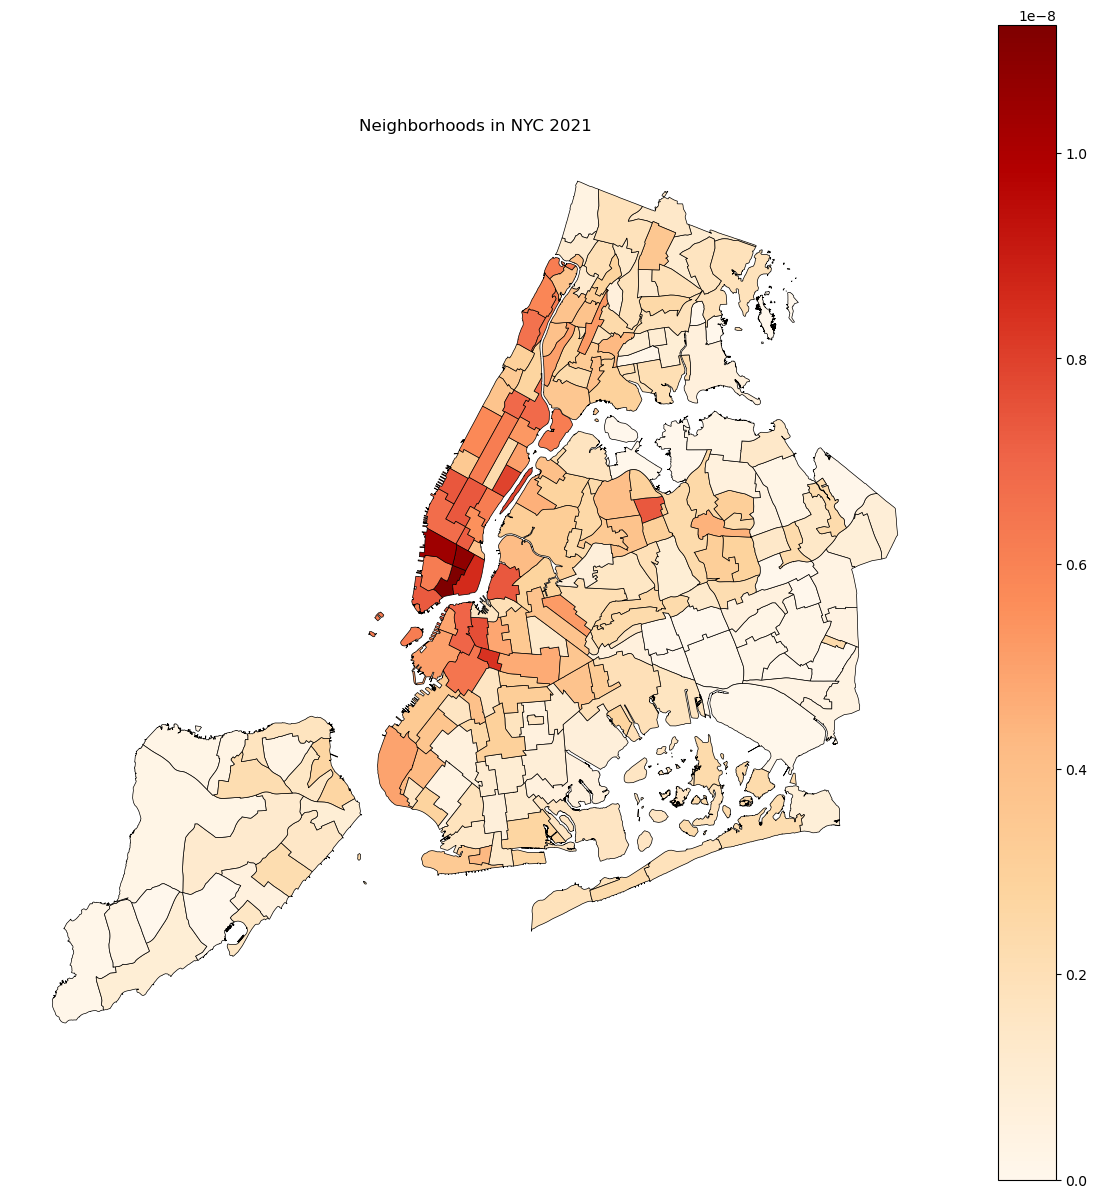

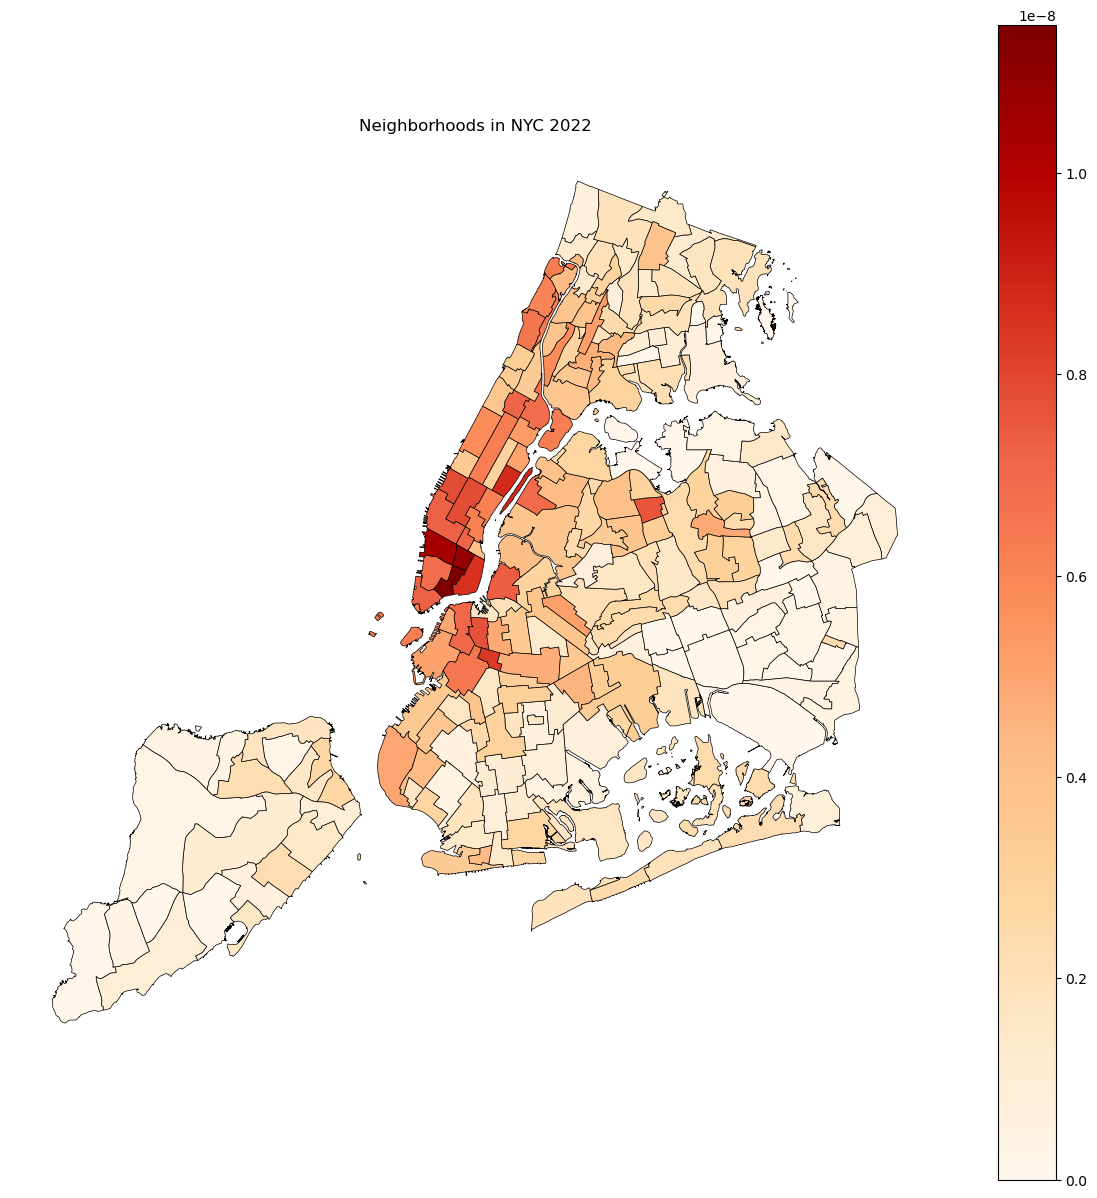

In [11]:
for i in years:
    fig, ax = plt.subplots(figsize=(15, 15))
    neighborhoods.plot(ax=ax, column=f'density_route_length_{i}', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black')
    plt.title(f'Neighborhoods in NYC {i}')
    plt.axis('off')
    plt.show()